In [5]:
import nibabel as nib
import nilearn.plotting as niplt
%matplotlib inline
import numpy as np
from pylab import *

In [109]:
labels=np.genfromtxt('/scratch/sreejank/CBIG-0.17.1-Schaefer2018_LocalGlobal/stable_projects/brain_parcellation/Schaefer2018_LocalGlobal/Parcellations/MNI/Schaefer2018_1000Parcels_17Networks_order.txt',dtype=str)[:,1]
[l for l in labels if 'Default' in l]

['17Networks_LH_DefaultA_IPL_1',
 '17Networks_LH_DefaultA_IPL_2',
 '17Networks_LH_DefaultA_IPL_3',
 '17Networks_LH_DefaultA_IPL_4',
 '17Networks_LH_DefaultA_IPL_5',
 '17Networks_LH_DefaultA_IPL_6',
 '17Networks_LH_DefaultA_IPL_7',
 '17Networks_LH_DefaultA_PFCd_1',
 '17Networks_LH_DefaultA_PFCd_2',
 '17Networks_LH_DefaultA_PFCd_3',
 '17Networks_LH_DefaultA_PFCd_4',
 '17Networks_LH_DefaultA_pCunPCC_1',
 '17Networks_LH_DefaultA_pCunPCC_2',
 '17Networks_LH_DefaultA_pCunPCC_3',
 '17Networks_LH_DefaultA_pCunPCC_4',
 '17Networks_LH_DefaultA_pCunPCC_5',
 '17Networks_LH_DefaultA_pCunPCC_6',
 '17Networks_LH_DefaultA_pCunPCC_7',
 '17Networks_LH_DefaultA_pCunPCC_8',
 '17Networks_LH_DefaultA_pCunPCC_9',
 '17Networks_LH_DefaultA_pCunPCC_10',
 '17Networks_LH_DefaultA_pCunPCC_11',
 '17Networks_LH_DefaultA_pCunPCC_12',
 '17Networks_LH_DefaultA_pCunPCC_13',
 '17Networks_LH_DefaultA_pCunPCC_14',
 '17Networks_LH_DefaultA_pCunPCC_15',
 '17Networks_LH_DefaultA_pCunPCC_16',
 '17Networks_LH_DefaultA_pCunPCC_1

In [39]:
def plot_parcels(parcel_lst):
    dataset='black'
    parcel_img=nib.load('/jukebox/griffiths/bert-brains/'+dataset+'_data/Schaefer1000_3mm.nii.gz')
    parcellation=parcel_img.get_fdata().astype('int')
    volume=np.zeros(parcellation.shape)
    volume[parcellation>0]+=0.05
    for p in parcel_lst:
        volume[np.where(parcellation==p)]=p 
    return nib.Nifti1Image(volume,parcel_img.affine)

def illuminate_coord(coord):
    dataset='black'
    parcel_img=nib.load('/jukebox/griffiths/bert-brains/'+dataset+'_data/Schaefer1000_3mm.nii.gz')
    parcellation=parcel_img.get_fdata().astype('int')
    volume=np.zeros(parcellation.shape)
    volume[coord[0]-3:coord[0]+4,coord[1]-3:coord[1]+4,coord[2]-3:coord[2]+4]=1
    return nib.Nifti1Image(volume,parcel_img.affine)

In [44]:
lst=[x+1 for x in range(len(labels)) if 'PFC' in labels[x]]
lst1=[i for i in lst if 'RH' in labels[i-1]]
print(lst1)

[775, 776, 777, 778, 779, 780, 781, 782, 792, 793, 794, 795, 796, 843, 844, 845, 846, 847, 848, 849, 850, 851, 852, 853, 854, 874, 875, 876, 877, 878, 879, 880, 881, 882, 883, 884, 885, 886, 887, 888, 889, 890, 891, 892, 893, 894, 895, 921, 922, 923, 924, 925, 938, 939, 940, 941, 942, 943, 944, 945, 946, 947, 955, 956, 957, 958, 959, 960, 961, 962, 963, 964, 965, 966, 967, 968]


In [48]:
parcellation.shape

(78, 93, 78)

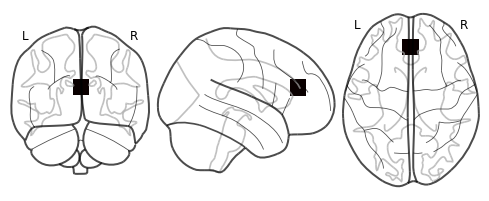

In [86]:
niplt.plot_glass_brain(illuminate_coord((39,69,39)))

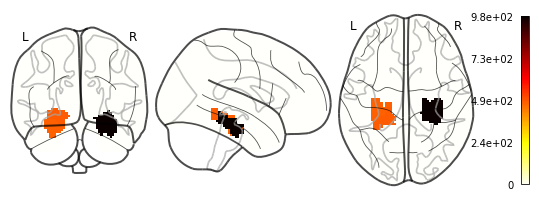

In [110]:
niplt.plot_glass_brain(plot_parcels([p+1 for p in range(len(labels)) if ('Default' in labels[p] and 'PFC' not in labels[p] and 'Temp' not in labels[p] and 'PHC' in labels[p])]),colorbar=True)

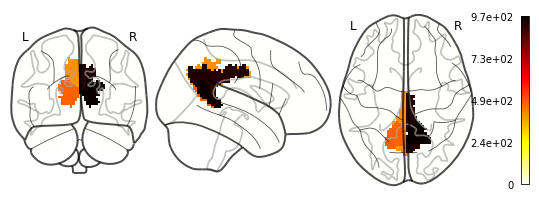

In [111]:
niplt.plot_glass_brain(plot_parcels([p+1 for p in range(len(labels)) if ('Default' in labels[p] and 'PFC' not in labels[p] and 'Temp' not in labels[p] and 'IPL' not in labels[p] and 'PHC' not in labels[p])]),colorbar=True)

((79, 95, 69), (78, 93, 78))

32512

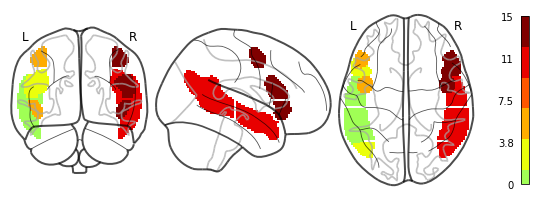

In [112]:
affine=nib.load('/jukebox/griffiths/bert-brains/LangParcels_n220_LH.img').affine
lh=np.round(nib.load('/jukebox/griffiths/bert-brains/LangParcels_n220_LH.img').get_fdata()).astype('int')
rh=np.round(nib.load('/jukebox/griffiths/bert-brains/LangParcels_n220_RH.img').get_fdata()).astype('int')
rh[rh>0]+=9
fed_roi_img=nib.Nifti1Image((lh+rh).astype('float'),affine)

cmap = cm.get_cmap('jet', 12) 

niplt.plot_glass_brain(fed_roi_img,colorbar=True,cmap=cmap)
nib.save(fed_roi_img,'/jukebox/griffiths/bert-brains/federenko_roi_raw.nii')
import os 
os.system('module load afni')
os.system('3dresample -input /jukebox/griffiths/bert-brains/federenko_roi_raw.nii -master /jukebox/griffiths/bert-brains/black_data/Schaefer1000_3mm.nii.gz -prefix /jukebox/griffiths/bert-brains/black_data/Federenko_3mm.nii.gz')
os.system('3dresample -input /jukebox/griffiths/bert-brains/federenko_roi_raw.nii -master /jukebox/griffiths/bert-brains/slumlordreach_data/Schaefer1000_3mm.nii.gz -prefix /jukebox/griffiths/bert-brains/slumlordreach_data/Federenko_3mm.nii.gz')

In [116]:
for dataset in ['slumlordreach','black']:
    parcel_img=nib.load('/jukebox/griffiths/bert-brains/'+dataset+'_data/Schaefer1000_3mm.nii.gz')
    parcel_volume=parcel_img.get_fdata().astype('int')
    roi_img=nib.load('/jukebox/griffiths/bert-brains/'+dataset+'_data/Federenko_3mm.nii.gz')
    roi_volume=roi_img.get_fdata().astype('int')

    all_pfc=[i+1 for i in range(len(labels)) if 'PFC' in labels[i]]

    z_coords=[np.mean(np.where(parcel_volume==p)[2]) for p in all_pfc]
    y_coords=[np.mean(np.where(parcel_volume==p)[1]) for p in all_pfc]
    threshold=parcel_volume.shape[2]/2.0
    threshold2=parcel_volume.shape[1]*.75
    vm_pfc=[all_pfc[i] for i in range(len(all_pfc)) if (z_coords[i]<=threshold and y_coords[i]>threshold2)]
    dm_pfc=[all_pfc[i] for i in range(len(all_pfc)) if (z_coords[i]>threshold and y_coords[i]>threshold2)]

    vm_lh_pfc=[p for p in vm_pfc if 'LH' in labels[p-1]]
    vm_rh_pfc=[p for p in vm_pfc if 'RH' in labels[p-1]]
    dm_lh_pfc=[p for p in dm_pfc if 'LH' in labels[p-1]]
    dm_rh_pfc=[p for p in dm_pfc if 'RH' in labels[p-1]]
    
    pmc=[p+1 for p in range(len(labels)) if ('Default' in labels[p] and 'PFC' not in labels[p] and 'Temp' not in labels[p] and 'IPL' not in labels[p] and 'PHC' not in labels[p])]
    pmc_lh=[p for p in pmc if 'LH' in labels[p-1]]
    pmc_rh=[p for p in pmc if 'RH' in labels[p-1]]



    for p in vm_lh_pfc:
        if np.sum(roi_volume[np.where(parcel_volume==p)]==0)>=np.prod(roi_volume[np.where(parcel_volume==p)].shape)*0.7:
            roi_volume[np.where(parcel_volume==p)]=7
    for p in dm_lh_pfc:
        if np.sum(roi_volume[np.where(parcel_volume==p)]==0)>=np.prod(roi_volume[np.where(parcel_volume==p)].shape)*0.7:
            roi_volume[np.where(parcel_volume==p)]=8
    for p in vm_rh_pfc:
        if np.sum(roi_volume[np.where(parcel_volume==p)]==0)>=np.prod(roi_volume[np.where(parcel_volume==p)].shape)*0.7:
            roi_volume[np.where(parcel_volume==p)]=7+9
    for p in dm_rh_pfc:
        if np.sum(roi_volume[np.where(parcel_volume==p)]==0)>=np.prod(roi_volume[np.where(parcel_volume==p)].shape)*0.7:
            roi_volume[np.where(parcel_volume==p)]=8+9
    
    for p in pmc_lh:
        if np.sum(roi_volume[np.where(parcel_volume==p)]==0)>=np.prod(roi_volume[np.where(parcel_volume==p)].shape)*0.7:
            roi_volume[np.where(parcel_volume==p)]=9
    
    for p in pmc_rh:
        if np.sum(roi_volume[np.where(parcel_volume==p)]==0)>=np.prod(roi_volume[np.where(parcel_volume==p)].shape)*0.7:
            roi_volume[np.where(parcel_volume==p)]=9+9






    
    
    parcels_to_roi=np.zeros((1000,))
    for p in range(1000):
        counts=np.zeros((18,))
        roi_parcel=roi_volume[np.where(parcel_volume==p+1)]
        for roi in range(18):
            counts[roi]=np.sum(roi_parcel==roi+1)
        best_roi=np.argmax(counts)
        best_count=counts[best_roi]
        num_parcel_voxels=np.sum(parcel_volume==p+1)
        if best_count>=num_parcel_voxels*0.4:
            parcels_to_roi[p]=best_roi+1 
    np.save('/jukebox/griffiths/bert-brains/'+dataset+'_data/Parcel2ROI.npy',parcels_to_roi) 
    

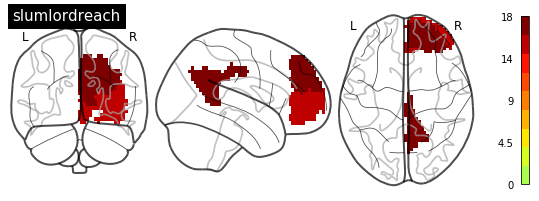

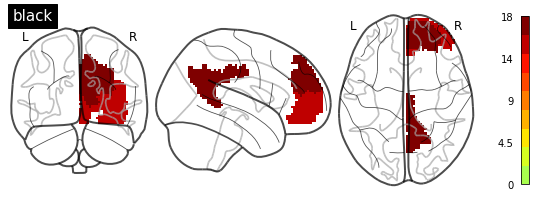

In [125]:
cmap = cm.get_cmap('jet', 19)
for dataset in ['slumlordreach','black']:
    parcel_img=nib.load('/jukebox/griffiths/bert-brains/'+dataset+'_data/Schaefer1000_3mm.nii.gz')
    parcel_volume=parcel_img.get_fdata().astype('int')
    mapping=np.load('/jukebox/griffiths/bert-brains/'+dataset+'_data/Parcel2ROI.npy')
    roi_volume=np.zeros(parcel_volume.shape)
    for p in range(1000):
        if mapping[p] in [7+9,8+9,9+9]:
            roi_volume[np.where(parcel_volume==p+1)]=mapping[p]
    roi_img=nib.Nifti1Image(roi_volume,parcel_img.affine) 
    niplt.plot_glass_brain(roi_img,colorbar=True,cmap=cmap,title=dataset)

In [121]:
new_rois=['vmPFC','dmPFC','PMC']